In [1]:
import numpy as np
import matplotlib.pyplot as plt

# keras contains the tensorflow package, often used for fitting NNets
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.losses import binary_crossentropy

In [2]:
# by default, the mnist data set in keras is already broken up into
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# note that the data are stored in a 3D array
# where the first number is the total number of images
x_test.shape

(10000, 28, 28)

In [4]:
# each image in the mnist data is a number stored in a 28 by 28 pixel image
img_rows, img_cols=28, 28

# this code would usually be a bit unnecessary because the data are all black and white (there is only one channel)
# but keras can be used for RGB (3 channel) images, and expects an extra dimension to the numpy array that describes
# the number of channels. We'll add a (pedantic) 1 to the dimensionality of each image.
# We'll also divide by 255 to do MinMaxScaling so that they are all between 0 and 1
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) / 255
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) / 255

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
# usually the mnist data is classified using all 10 digits
# but we'll simplify it and just try to predict 6 vs. not 6
y_6train = (y_train == 6).astype(int)
y_6test = (y_test == 6).astype(int)

In [7]:
# check out the test output
y_6test

array([0, 0, 0, ..., 0, 0, 1])

In [8]:
# grab our image plotter from the other notebook
def plot_img(x, im_shape):
    plt.imshow(x.reshape(im_shape), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.gcf().set_size_inches(4, 4)

In [9]:
# this should be a 6
#x_test[x_test.shape[0]-1]

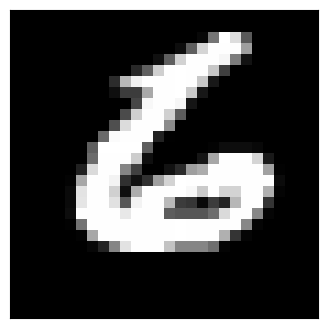

In [10]:
plot_img(x_test[x_test.shape[0]-1], im_shape=(28,28))

In [11]:
# to build a CNN with one Convolutional Layer
# (with a single 3 by 3 kernel with stride 1 and no activation (you could add an activation to the Convolutional Layer if you wanted))
# and a single hidden layer with ReLU activation
# and using the sigmoid activation for the output:
inpx = Input(shape=(img_rows, img_cols, 1))

# can also add padding in here with the padding = 'valid' (no padding) or 'same' (padding) option
# check out the full range of options here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
con_layer = Conv2D(1, kernel_size=(3, 3), strides=1, activation=None)(inpx)

# could add pooling to reduce the dimension further and speed up computation
#pool_layer = MaxPooling2D(pool_size=(3, 3))(conv_layer)

# need to flatten the images for the hidden layer/output
flat_G = Flatten()(con_layer)

# can decide how many hidden nodes to use
hid_layer = Dense(250, activation='relu')(flat_G)

# could add a second hidden layer
#hid_layer2 = Dense(100, activation='tanh')(hid_layer)

out_layer = Dense(1, activation='sigmoid')(hid_layer)

# you can add way more in terms of layers/different activation functions/etc. to potentially make this work better!

In [12]:
# now to fit the model
model = Model([inpx], out_layer)
# note: there are different optimizers you can use (SGD is similar to the Gradient Descent we would do manually,
# but there are some more efficient options, such as Adam (adaptive step-size): https://keras.io/api/optimizers/)
# we also need to specify the objective/loss function. The keras version of log-loss (which you'll use for binary classification) is "binary_crossentropy".
# there are plenty of others to choose based on the situation: https://keras.io/api/losses/
model.compile(optimizer=SGD(),
              loss=binary_crossentropy,
              metrics=['accuracy'])

In [13]:
# now, fit the model (this may take some time depending on your parameter choices)
# if you want to speed this up further, you can specify a smaller batch_size (a random subset of the data to work on during each epoch)
# numbers are pretty distinguishable, so it shouldn't take too many epochs to get a decent fit
model.fit(x_train, y_6train, epochs=10) #if you just want a progress bar (verbose=1) or to not display anything (verbose=0) the output will be cleaner

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9514 - loss: 0.1433
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9887 - loss: 0.0365
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9908 - loss: 0.0295
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9928 - loss: 0.0230
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9941 - loss: 0.0186
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9954 - loss: 0.0141
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9958 - loss: 0.0125
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9965 - loss: 0.0114
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9969 - loss: 0.0101
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9972 - loss: 0.0088


In [14]:
# checking test set performance
score = model.evaluate(x_test, y_6test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.01371559128165245
accuracy= 0.9955999851226807


In [15]:
# Seems good, but check HOW it's good
import pandas as pd

preds = model.predict(x_test)
y_true = np.asarray(y_6test).ravel().astype(int)
y_pred = (preds.reshape(-1) >= 0.5).astype(int)
tbl = pd.crosstab(y_pred, y_true, rownames=['Predicted'], colnames=['Actual'])
print(tbl)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Actual        0    1
Predicted           
0          9032   34
1            10  924


In [16]:
# print kernel weights of the convolutional layer
conv_weights = model.layers[1].get_weights()[0]
W = conv_weights[:,:,0,0]
print("Convolutional kernel weights:")
print(W)

Convolutional kernel weights:
[[-0.00999276  0.09565605 -0.02722668]
 [-0.33895501 -0.79619735 -1.0563811 ]
 [-0.37598798 -0.8659836  -1.2493305 ]]


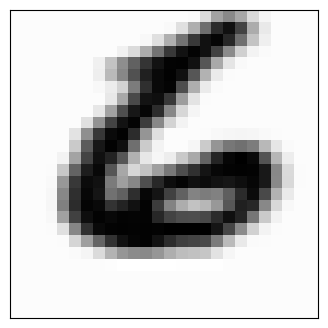

In [17]:
# grab the convMat function from cnn.ipynb to do the forward pass and then visualize what the recovered kernel is doing
def convMat(X, W):
    # get the dimensions of the kernel and input
    k, _ = W.shape
    p, _ = X.shape

    # calculate the dimensions of the output matrix
    q = p - k + 1
    G = np.zeros((q, q))

    # do the thing
    for m in range(q):
        for n in range(q):
            submatrix = X[m:m+k, n:n+k]
            G[m, n] = np.sum(W * submatrix)

    return G

G = convMat(x_test[x_test.shape[0]-1][:,:,0], W)

# image isn't changing a lot in the convolutional layer
plot_img(G, G.shape)